https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [66]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
df = pd.read_csv('temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [67]:
df = pd.get_dummies(df)
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### 3. Divide en train y test

In [68]:
X = np.array(df.drop(["actual"],axis=1))
y= np.array(df["actual"])


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [69]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=7)
dtr = DecisionTreeRegressor()
dtr.fit(train_X, train_y)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [70]:
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.71 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

In [71]:
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.73 %.


### 7. Representa el árbol de decision

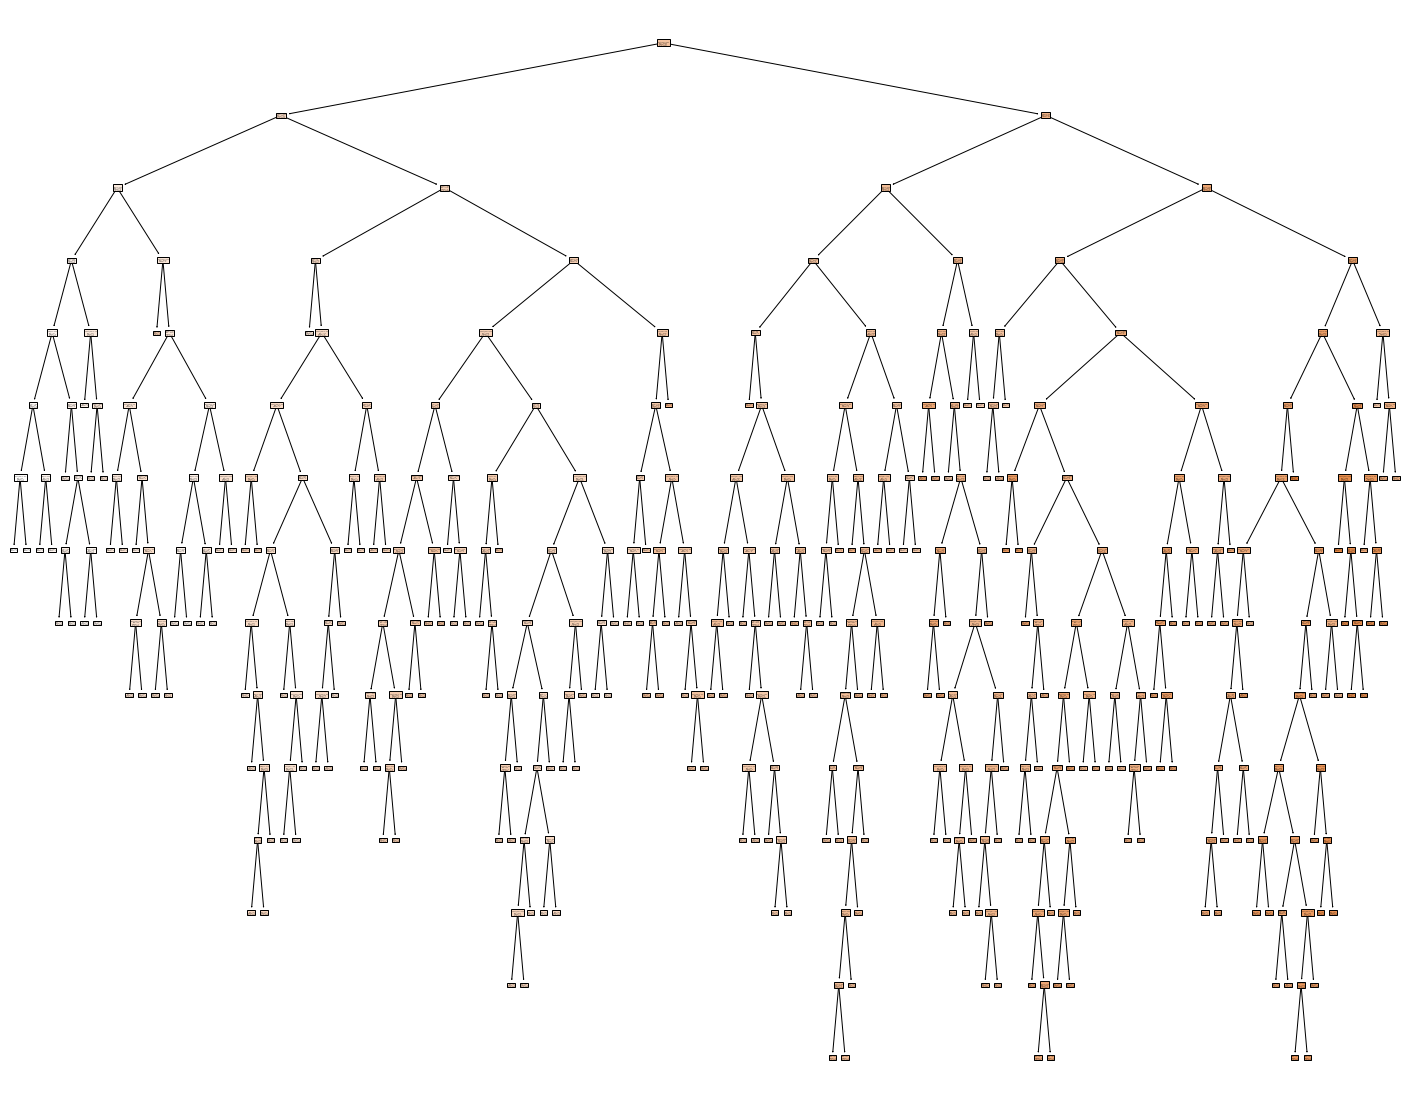

In [72]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( dtr, 
                   feature_names=df.columns,  
                   class_names=y,
                   filled=True)

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [77]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train_X, train_y)
predictions = dtr.predict(test_X)

### 9. Vuelve a calcular si MAE

In [78]:
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.98 degrees.


In [79]:
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.59 %.


### 10. Vuelve a representar su árbol

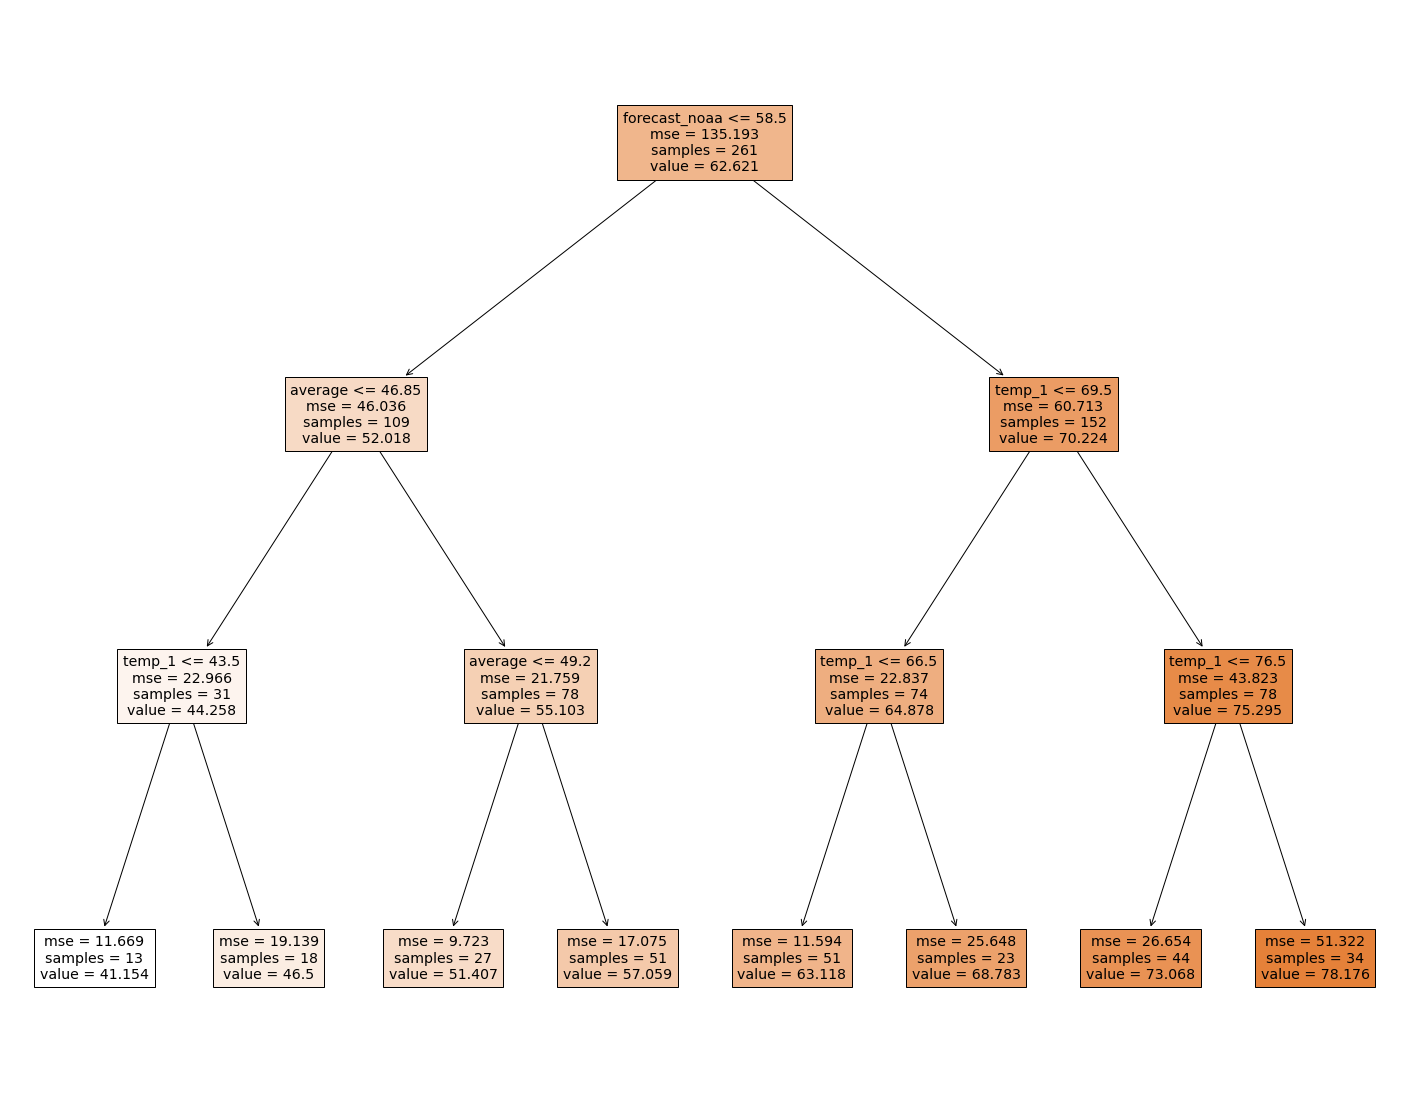

In [80]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( dtr, 
                   feature_names=df.columns,  
                   class_names=y,
                   filled=True)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [83]:
importances = list(dtr.feature_importances_)
columnas = df.drop("actual",axis=1)
feature_list = columnas.columns
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: forecast_acc         Importance: 0.71
Variable: temp_1               Importance: 0.18
Variable: average              Importance: 0.11
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: temp_2               Importance: 0.0
Variable: forecast_noaa        Importance: 0.0
Variable: forecast_under       Importance: 0.0
Variable: friend               Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]